# User_logs dataset

In [48]:
import pandas as pd
import seaborn as sns

### Чтение данных из файла

In [2]:
df1 = pd.read_csv('user.csv')
df2 = pd.read_csv('logs.csv')

### Вывод данных, размер и информация о таблице

In [81]:
df1.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [82]:
df2.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [7]:
df1.shape

(2954, 3)

In [8]:
df2.shape

(4500, 4)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


### Количество уникальных значений столбца platform

In [6]:
df2['platform'].nunique()

3

### Клиенты, совершившие наибольшее количество успешных операций

In [40]:
df2_success = df2.query('success == True')\
    .groupby('client', as_index=False)\
    .agg({'success': 'count'})\
    .sort_values('success', ascending=False)
df2_success.query('success == @df2_success.success.max()').client.tolist()

[12179, 61468, 52870, 61473, 92584, 82563, 78349, 36165, 28719]

### Платформы и количество успешных операций

In [43]:
df2.query('success == True').groupby('platform').agg({'success': 'count'})

,success
platform,
computer,1090
phone,2019
tablet,180


### Джойн таблиц

In [45]:
df_merge = df1.merge(df2, on='client', how='inner')
df_merge

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


### Наиболее популярная платформа среди премиумных клиентов

In [47]:
df_merge.query('success == True and premium == True').groupby('platform').agg({'success': 'count'})

,success
platform,
computer,108
phone,177
tablet,18


### Визуализация распределения возраста клиентов от их типов

C:\Users\egorn\AppData\Local\Temp\ipykernel_52812\2748378094.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merge.query('premium == True').age)
C:\Users\egorn\AppData\Local\Temp\ipykernel_52812\2748378094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merge.query('premium == Fals

<Axes: xlabel='age', ylabel='Density'>

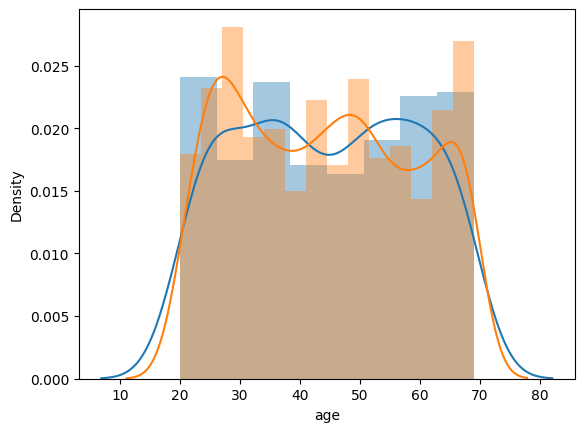

In [54]:
sns.distplot(df_merge.query('premium == True').age)
sns.distplot(df_merge.query('premium == False').age)

### Визуализация распределения количества успешных операций от количества клиентов

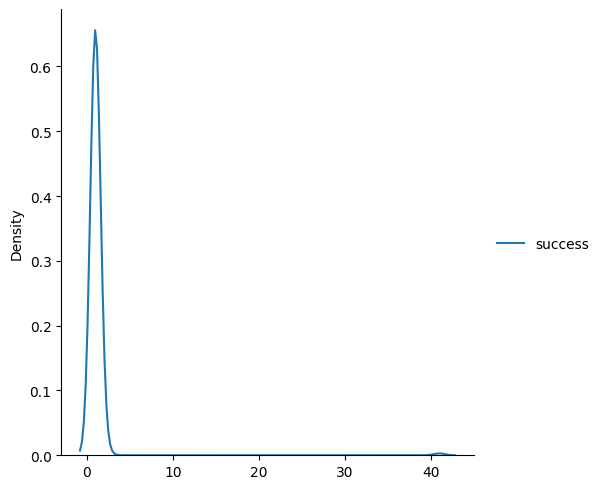

In [67]:
sns.displot(df_merge.query('success == True').groupby('client').agg({'success': 'sum'}), kind='kde')

### Визуализация распределения количества успешных операций на платформе computer от возраста клиентов

<Axes: xlabel='age', ylabel='success'>

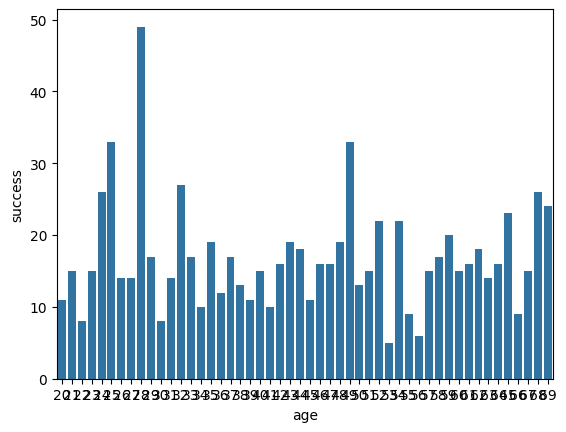

In [78]:
df_bar = df_merge.query('success == True and platform == "computer"').groupby('age').agg({'success': 'sum'}).reset_index()
sns.barplot(x=df_bar.age, y=df_bar.success)